In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
log_path = Path("/home/kafka/repos/thesis/logs_all")
MACHINE = "desktop"
BATCH_SIZE = 128
DATASET = "compcars"

model_name = f"resnet18_bs_{BATCH_SIZE}"

model_path_prefix = "resnet18_pretrained_pid"

# Single training
train_path = log_path / "single_runs" / DATASET

# Shared data training
train_mul_path = log_path / "queues" / DATASET / model_name

naive_model_path_prefix = f"resnet18_pretrained_bs{BATCH_SIZE}_8tw_1vw_pid"
shared_model_path_prefix = f"resnet18_pretrained_bs{BATCH_SIZE}_8tw_1vw_1pf_pid"

if DATASET == "compcars":
    # CompCars, BS 128
    pids = [
        7582, 7792, # Naive
        8158, 8372, # MPS
        12500, 12766, # Shared
        13113, 13396, # Shared + MPS
        10394, 10499, # Naive + DALI
        13738, 13861, # Shared + DALI
        6129, 6269, # Naive + DALI + MPS
        6514, 6672, # Shared + DALI + MPS
        1951400, 1988951, # Naive, Dummy data
    ]

    trace_pids = [
        7582, 7792, # Naive
        8158, 8372, # MPS
        12468, 12734, # Shared
        13081, 13364, # Shared + MPS
        10394, 10499, # Naive + DALI
        13712, 13835, # Shared + DALI
        6129, 6269, # Naive + DALI + MPS
        6488, 6643, # Shared + DALI + MPS
        1951400, 1988951, # Naive, Dummy data
    ]

if DATASET == "imagenet64x64":
    pids = [
        10844, # Naive
         # MPS
         # Shared
         # Shared + MPS
    ]

    trace_pids = [
        # Naive
         # MPS
         # Shared
         # Shared + MPS
    ]


In [10]:
# BASELINE

df_1x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[0]}.csv")
df_2x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[1]}.csv")

# BASELINE + MPS

df_1x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[2]}.csv")
df_2x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[3]}.csv")

# SHARED DATA

df_mul_1x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[4]}.csv")
df_mul_2x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[5]}.csv")

# SHARED DATA + MPS

df_mul_1x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[6]}.csv")
df_mul_2x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[7]}.csv")

# BASELINE + DALI

df_dali_1x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[8]}.csv")
df_dali_2x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[9]}.csv")

# SHARED + DALI

df_mul_dali_1x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[10]}.csv")
df_mul_dali_2x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[11]}.csv")

# BASELINE + DALI + MPS

df_dali_1x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[12]}.csv")
df_dali_2x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[13]}.csv")

# SHARED + DALI + MPS

df_mul_dali_1x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[14]}.csv")
df_mul_dali_2x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[15]}.csv")

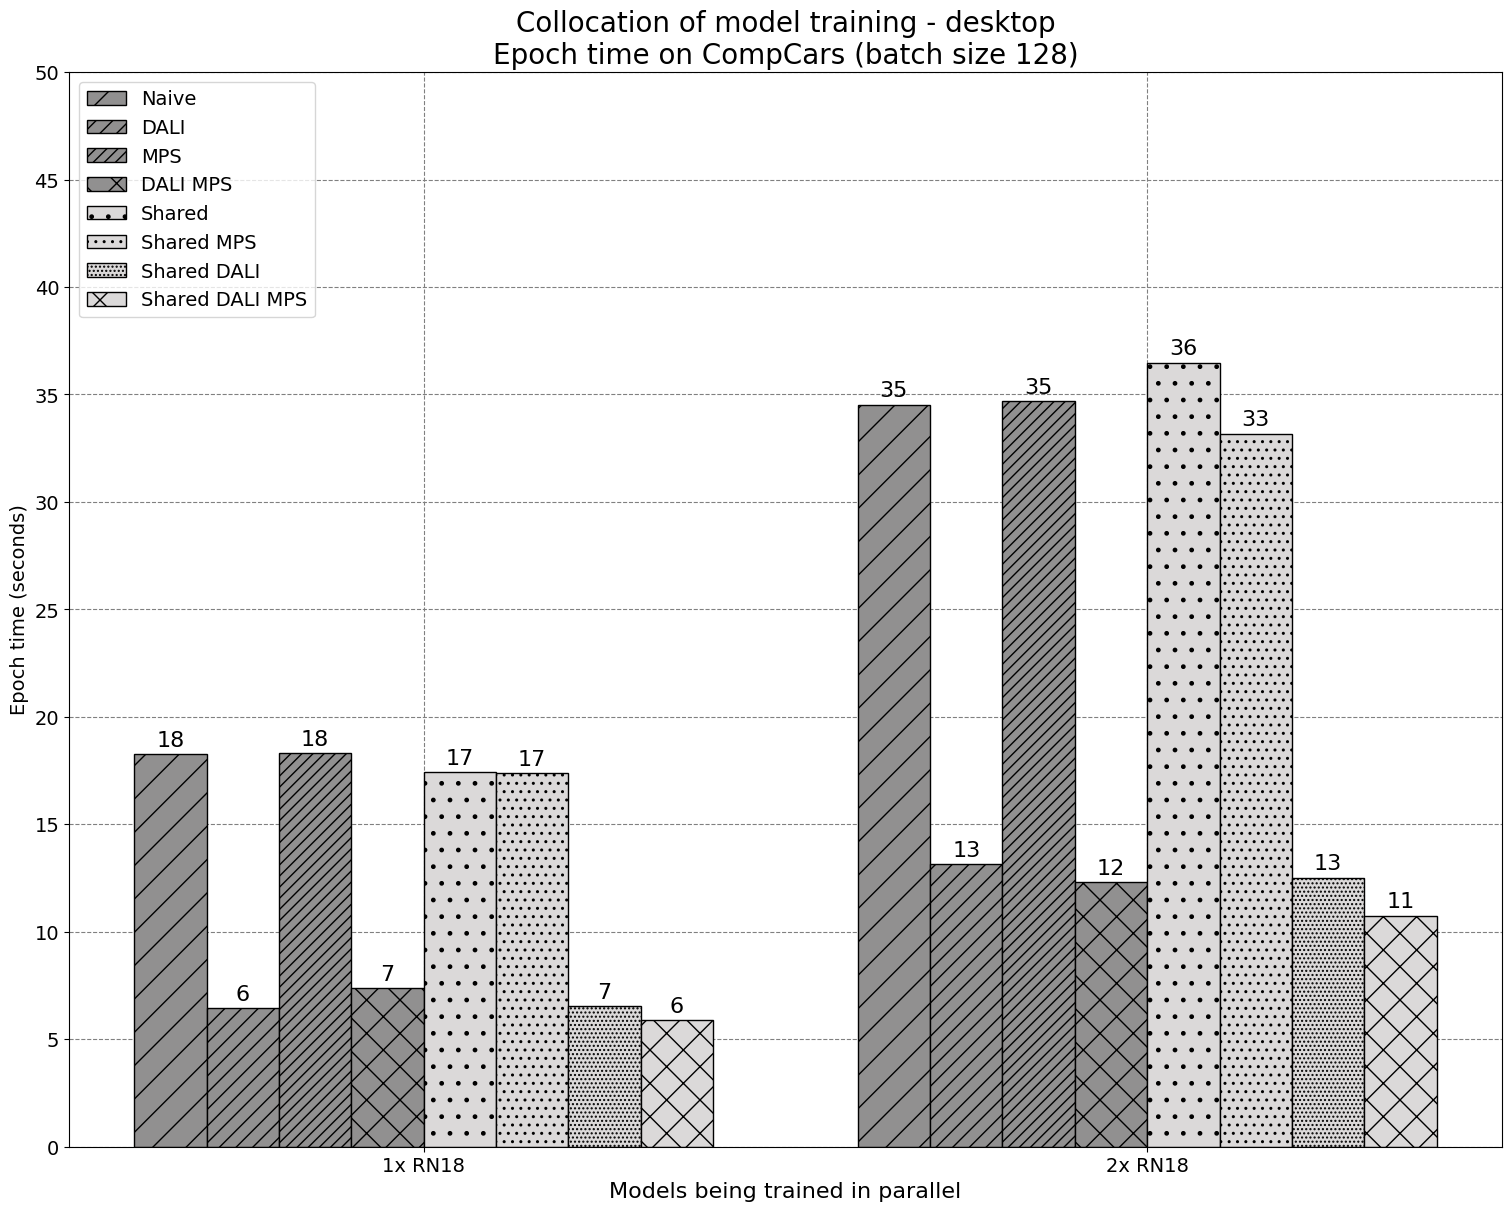

In [12]:
import matplotlib.pyplot as plt
import numpy as np

workloads = ("1x RN18", "2x RN18")

naive = [df.iloc[2:-1]["total_time"].mean() for df in [df_1x, df_2x]]

naive_dali = [df.iloc[2:-1]["total_time"].mean() for df in [df_dali_1x, df_dali_2x]]

mps = [df.iloc[2:-1]["total_time"].mean() for df in [df_1x_mps, df_2x_mps]]

naive_dali_mps = [df.iloc[2:-1]["total_time"].mean() for df in [df_dali_1x_mps, df_dali_2x_mps]]

shared = [df.iloc[2:-1]["total_time"].mean() for df in [df_mul_1x, df_mul_2x]]

shared_dali = [df.iloc[2:-1]["total_time"].mean() for df in [df_mul_dali_1x, df_mul_dali_2x]]

shared_mps = [df.iloc[2:-1]["total_time"].mean() for df in [df_mul_1x_mps, df_mul_2x_mps]]

shared_dali_mps = [df.iloc[2:-1]["total_time"].mean() for df in [df_mul_dali_1x_mps, df_mul_dali_2x_mps]]

measurements ={
    "Naive": naive,
    "DALI": naive_dali,
    "MPS": mps,
    "DALI MPS": naive_dali_mps,
    "Shared": shared,
    "Shared MPS": shared_mps,
    "Shared DALI": shared_dali,
    "Shared DALI MPS": shared_dali_mps,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -2.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,12))
#shades = ["#0a0a0a", "#4d4c4c", "#919090", "#dbd9d9"]
#shades = ["#000000", "#1f1e1e", "#4d4b4b", "#757272", "#9c9797", "#bfbaba"]
hatches = ["/", "//", "///", "x", ".", "..", "....", "x"]
hatch_cols = ["#919090", "#919090", "#919090", "#919090", 
              "#dbd9d9", "#dbd9d9", "#dbd9d9", "#dbd9d9"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black", yerr=measurements_err[attribute][idx], ecolor="red", capsize=5)
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black")
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Epoch time (seconds)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nEpoch time on CompCars (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 51, 5)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

In [5]:
# BASELINE

df_1x = pd.read_csv( \
    train_path / model_name / f"{naive_model_path_prefix}_{pids[0]}_gpu_util.csv")
df_2x = pd.read_csv( \
    train_path / model_name / f"{naive_model_path_prefix}_{pids[1]}_gpu_util.csv")

# BASELINE + MPS

df_1x_mps = pd.read_csv( \
    train_path / model_name / f"{naive_model_path_prefix}_{pids[2]}_gpu_util.csv")
df_2x_mps = pd.read_csv( \
    train_path / model_name / f"{naive_model_path_prefix}_{pids[3]}_gpu_util.csv")

# SHARED DATA

df_mul_1x = pd.read_csv( \
    train_mul_path / f"{shared_model_path_prefix}_{pids[4]}_gpu_util.csv")
df_mul_2x = pd.read_csv( \
    train_mul_path / f"{shared_model_path_prefix}_{pids[5]}_gpu_util.csv")

# SHARED DATA + MPS

df_mul_1x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[6]}_gpu_util.csv")
df_mul_2x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[7]}_gpu_util.csv")

# BASELINE + DALI

df_dali_1x = pd.read_csv( \
    train_path / model_name / f"{naive_model_path_prefix}_{pids[8]}_gpu_util.csv")
df_dali_2x = pd.read_csv( \
    train_path / model_name / f"{naive_model_path_prefix}_{pids[9]}_gpu_util.csv")

# SHARED + DALI

df_mul_dali_1x = pd.read_csv( \
    train_mul_path / f"{shared_model_path_prefix}_{pids[10]}_gpu_util.csv")
df_mul_dali_2x = pd.read_csv( \
    train_mul_path / f"{shared_model_path_prefix}_{pids[11]}_gpu_util.csv")

# BASELINE + DALI + MPS

df_dali_1x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[12]}_gpu_util.csv")
df_dali_2x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[13]}_gpu_util.csv")

# SHARED + DALI + MPS

df_mul_dali_1x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[14]}_gpu_util.csv")
df_mul_dali_2x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[15]}_gpu_util.csv")

In [6]:
dfs_single = [
    df_1x,
    df_2x,
    df_1x_mps,
    df_2x_mps,
    df_dali_1x,
    df_dali_2x,
    df_dali_1x_mps,
    df_dali_2x_mps,
]

dfs_shared = [
    df_mul_1x,
    df_mul_2x,
    df_mul_1x_mps,
    df_mul_2x_mps,
    df_mul_dali_1x,
    df_mul_dali_2x,
    df_mul_dali_1x_mps,
    df_mul_dali_2x_mps,
]

lists_single, lists_shared = [], []

for idx, df in enumerate(dfs_single):
    df["mem"] = df.apply(lambda x: x[" used_gpu_memory [MiB]"].strip(" MiB"), axis=1).astype(int)
    mem = df.groupby([" pid"]).max()["mem"].sum()
    lists_single.append(mem)

for idx, df in enumerate(dfs_shared):
    df["mem"] = df.apply(lambda x: x[" used_gpu_memory [MiB]"].strip(" MiB"), axis=1).astype(int)
    mem = df.groupby([" pid"]).max()["mem"].sum()
    lists_shared.append(mem)


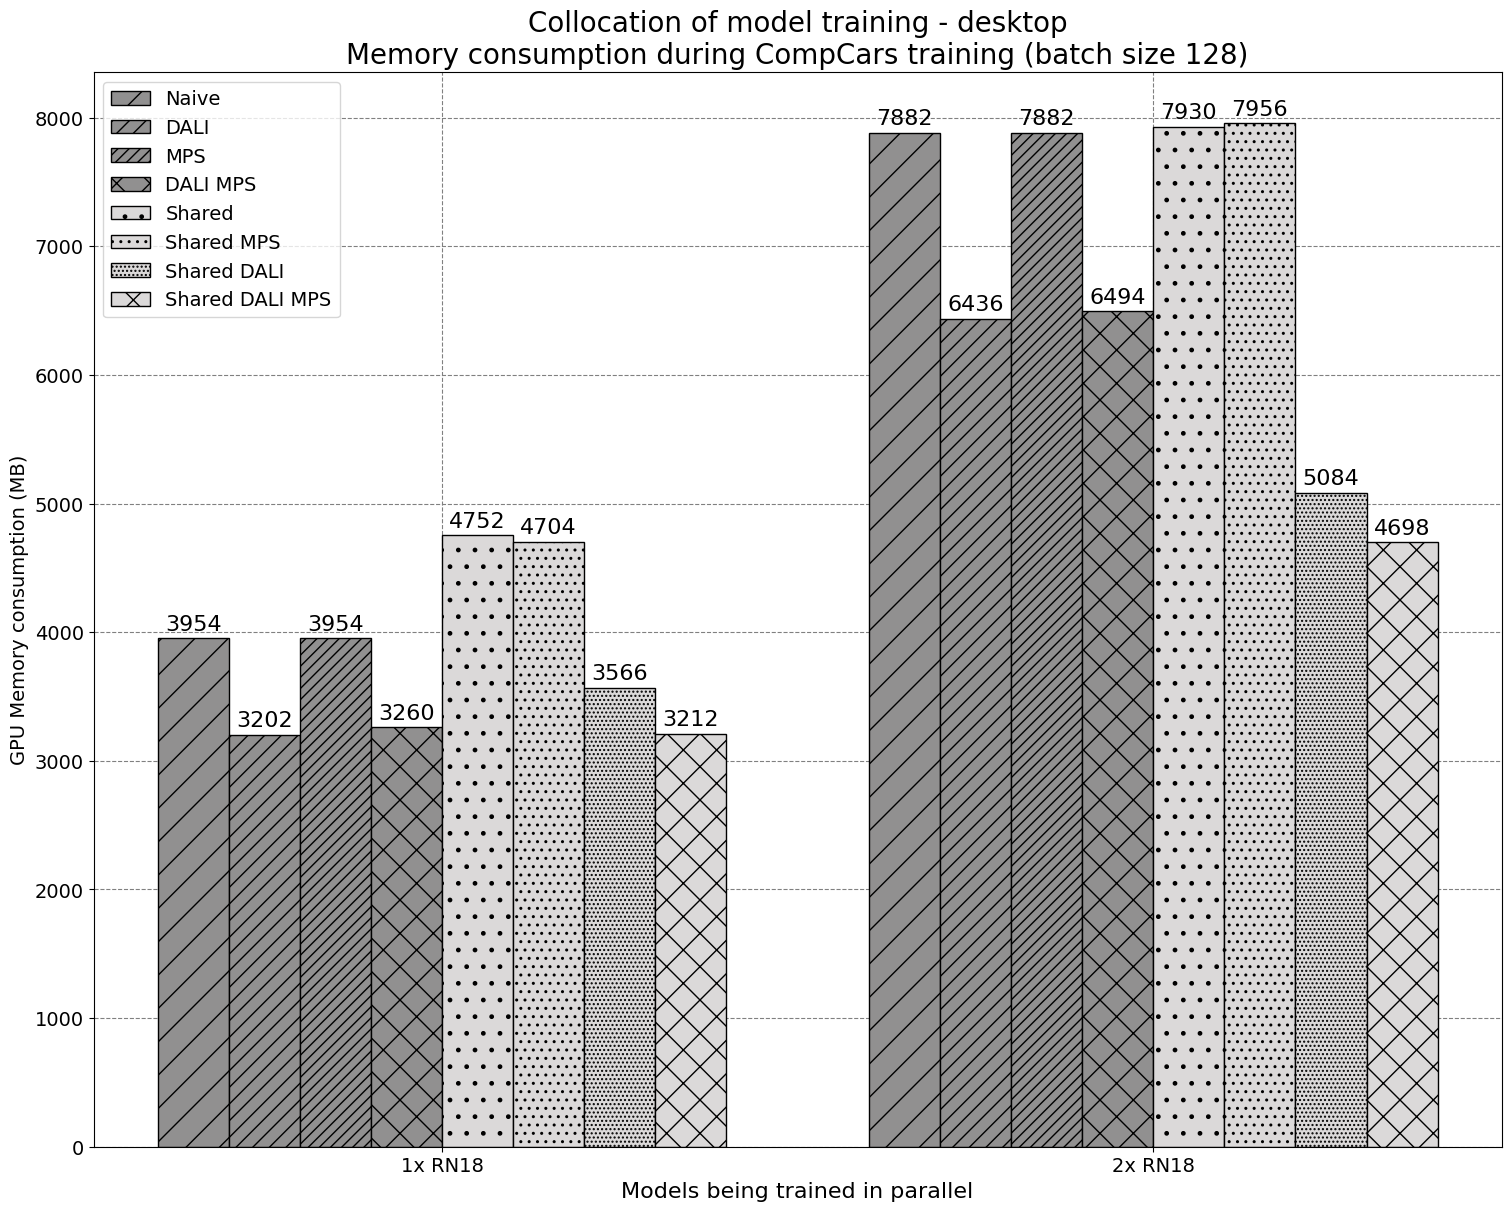

In [8]:
import matplotlib.pyplot as plt
import numpy as np

workloads = ("1x RN18", "2x RN18")

naive = lists_single[:2]

naive_dali = lists_single[4:6]

mps = lists_single[2:4]

naive_dali_mps = lists_single[6:]

shared = lists_shared[:2]

shared_dali = lists_shared[4:6]

shared_mps = lists_shared[2:4]

shared_dali_mps = lists_shared[6:]

measurements ={
    "Naive": naive,
    "DALI": naive_dali,
    "MPS": mps,
    "DALI MPS": naive_dali_mps,
    "Shared": shared,
    "Shared MPS": shared_mps,
    "Shared DALI": shared_dali,
    "Shared DALI MPS": shared_dali_mps,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -2.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,12))
hatches = ["/", "//", "///", "x", ".", "..", "....", "x"]
hatch_cols = ["#919090", "#919090", "#919090", "#919090", 
              "#dbd9d9", "#dbd9d9", "#dbd9d9", "#dbd9d9"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black", yerr=measurements_err[attribute][idx], ecolor="red", capsize=5)
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black")
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('GPU Memory consumption (MB)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nMemory consumption during CompCars training (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 8192, 1000)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()